In [1]:

#primero importamos las librerías que vamos a necesitar para el analisis de nuestros datos
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [2]:
# Cargar datos
df_games = pd.read_csv("games (1).csv")

In [3]:
# primero cargamos los datos para poder observar a que nos enfrentamos.
df_games.info()

df_games.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16149,Winning Post 7 Maximum 2008,PS2,2008.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
321,Namco Museum Vol.1,PS,1995.0,Misc,2.12,1.44,0.22,0.06,NaN,NaN,NaN
14839,Infinite Stratos 2: Ignition Hearts,PS3,2014.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7989,Sports Illustrated for Kids: Football,GBA,2003.0,Sports,0.13,0.05,0.00,0.00,NaN,NaN,NaN
15118,Rugby League Live 3,X360,2015.0,Action,0.00,0.02,0.00,0.00,NaN,7,E
2070,Road & Track Presents: The Need for Speed,PS,1995.0,Racing,0.56,0.38,0.00,0.07,NaN,NaN,NaN
14241,Makai Senki Disgaea 4: Fuuka & Desco-hen Hajim...,PS3,2011.0,Strategy,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15897,Elven Legacy Collection,PC,2010.0,Strategy,0.00,0.01,0.00,0.00,NaN,tbd,NaN
9951,The Price is Right: Decades,Wii,2011.0,Misc,0.11,0.00,0.00,0.01,NaN,tbd,E10+
3612,Final Fantasy IV: The Complete Collection,PSP,2011.0,Role-Playing,0.13,0.09,0.27,0.06,77.0,7.5,E10+


In [4]:
df_games[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]].describe().round(2)

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.00,16715.00,16715.00,16715.00
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


In [5]:
df_games["Genre"].value_counts().sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: Genre, dtype: int64

PLAN DE ACCIÓN PARA PREPARACIÓN DE DATOS

Cambiar los nombres de las columnas a formato snake_case.
Eliminar los valores perdidos de las columnas Name y Genre visto que son solamente 2 filas. La misma acción para Year_of_Release que tiene cerca de 250 valores perdidos (aprox. 1.5% del total de filas)
Agrupar las opciones existentes de la columna Platform en tipologías de forma que se cree la columna platform_group (i.e Nintendo, Playstation, etc.). Esto, ya que existen muchas opciones posibles y desbalanceadas lo cual puede dificultar la interpretacion de resultados posteriores.
Sustituir el valor “tbd” de la columna User_Score por un valor perdido numérico. De esta manera posteriormente la columna se puede transformar a flotante.
Una vez transformada la columna User_Score, multiplicar por 10 sus valores de forma que se estandaricen las magnitudes con Critic_Score y facilitar así su comparación.
Si bien ambas columnas de score cuentan con valores ausentes no hay que darles ningún tratamiento en particular. Por un lado son una proporcion importante del dataset; y por otro, un valor perdido aquí reflejaría una realidad propia del contexto, y es que hay videojuegos que simplemente no han sido calificados.
En la columna Rating cambiar las opciones existentes por otros valores que den una interpretación más semántica de los datos y faciliten así su interpretación durante el análisis.
En esta columna también se pueden asignar los valores perdidos como pendientes de calificación pues esta tipología existe en ESRB y resulta coherente con el contexto.
Generar una nueva columna total_sales que agregue las ventas a nivel mundial. Esto ya que al ser este indicador uno de los que se analizarán, conviene tener un valor agregado que evite códigos redundantes posteriormente.
Eliminar duplicados detectados en el dataset pues corresponden seguramente a errores de registro.

In [6]:

# Cambiar los nombres de las columnas a snake_case
df_games.columns = [x.lower().replace(" ","_") for x in df_games.columns]
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Eliminar valores perdidos de name, genre y year_of_release
df_games = df_games.dropna(subset = ["name","genre", "year_of_release"])
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Aqui cambiamos de esta forma los valores perdidos, para que sea más claro al momento de analizar los datos, el saber que nos encontramos antre un valor perdido o ausente y no se trata de algun error.

In [8]:

# Sustuimos "tbd" por valor perdido numérico en user_score
df_games["user_score"] = df_games["user_score"].replace("tbd", np.nan)
df_games["user_score"].unique()
#Aqui sustituimos el TBD por un valor perdido númerico ya que para nuestro analisis de datos, no aporta nada que el valor perdido no este como valor numérico



array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [9]:
# Transformar user_Score a flotante
df_games["user_score"] = df_games["user_score"].astype(float)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [10]:

# Crear columna con grupos de plataformas
def fun_plataforma (x):
    if x in ["3DS","DS","GB","GBA","GC","N64","NES","SNES","Wii","WiiU"]:
        return "Nintendo"
    elif x in ["PC","PCFX"]:
        return "PC"
    elif x in ["PS","PS2","PS3","PS4","PSP","PSV"]:
        return "PlayStation"
    elif x in ["X360","XB","XOne"]:
        return "XBox"
    else:
        return "Other"

df_games["platform_group"] = df_games["platform"].apply(fun_plataforma) #map
df_games.sample(5)
df_games["platform_group"].value_counts()


PlayStation    6637
Nintendo       6169
XBox           2282
PC              958
Other           398
Name: platform_group, dtype: int64

Aqui considero que para nuestro análisis será más sencillo tener a los juegos agrupados por plataformas ya, agrupandolos ya sea por la empresa que maneja dicho videojuego, en una sola y así poder identificarla más fácil y rápido.

In [11]:
# Multiplicamos user_score x 10
df_games["user_score"] = df_games["user_score"] * 10
df_games[["critic_score","user_score"]].describe().round(2)

,critic_score,user_score
count,7983.00,7463.00
mean,68.99,71.26
std,13.92,14.99
min,13.00,0.00
25%,60.00,64.00
50%,71.00,75.00
75%,79.00,82.00
max,98.00,97.00


In [12]:
# Hacer más semantico el rating
def fun_rating (x):
    if x == "E" or x == "K-A":
        return "Everyone"
    elif x == "T":
        return "Teens"
    elif x == "M":
        return "Mature"
    elif x == "E10+":
        return "Everyone from 10 year"
    elif x == "EC":
        return "Early Childhood"
    elif x == "RP":
        return "Pending"
    elif x == "AO":
        return "Adults Only"
    else:
        return "Pending"

df_games["rating"] = df_games["rating"].apply(fun_rating)
df_games["rating"].value_counts()

Pending                  6677
Everyone                 3924
Teens                    2905
Mature                   1536
Everyone from 10 year    1393
Early Childhood             8
Adults Only                 1
Name: rating, dtype: int64

In [13]:
# Crear columna total_sales
df_games["total_sales"] = df_games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis = 1)
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,total_sales
11017,Driver: Renegade,3DS,2011.0,Racing,0.05,0.04,0.00,0.01,48.0,50.0,Mature,Nintendo,0.10
4470,Yu-Gi-Oh! 5D's Tag Force 4,PSP,2009.0,Strategy,0.19,0.07,0.12,0.05,NaN,NaN,Pending,PlayStation,0.43
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Pending,Nintendo,14.60
10698,Tom Clancy's HAWX 2,Wii,2010.0,Action,0.06,0.03,0.00,0.01,47.0,NaN,Teens,Nintendo,0.10
8042,Klonoa: Door to Phantomile,PS,1997.0,Platform,0.00,0.00,0.17,0.01,NaN,NaN,Pending,PlayStation,0.18


In [14]:
# Eliminar duplicados detectados
df_games = df_games.drop_duplicates(subset = ["name", "platform", "year_of_release", "genre"])
df_games.duplicated(subset = ["name", "platform", "year_of_release", "genre"]).sum()

0

In [15]:

# Resetear indices
df_games = df_games.reset_index(drop = True)
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  platform_group   16443 non-null  object 
 12  total_sales      16443 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.6+ MB


In [16]:
juegos_por_año = df_games.groupby("year_of_release")["name"].count().reset_index()
juegos_por_año.columns = ["year_of_release", "number_of_games"]

print("Tabla de Juegos Lanzados por Año:")
print(juegos_por_año.tail(10)) # Mostramos los últimos 10 años para ver la tendencia reciente

Tabla de Juegos Lanzados por Año:
    year_of_release  number_of_games
27           2007.0             1197
28           2008.0             1427
29           2009.0             1426
30           2010.0             1255
31           2011.0             1136
32           2012.0              652
33           2013.0              544
34           2014.0              581
35           2015.0              606
36           2016.0              502


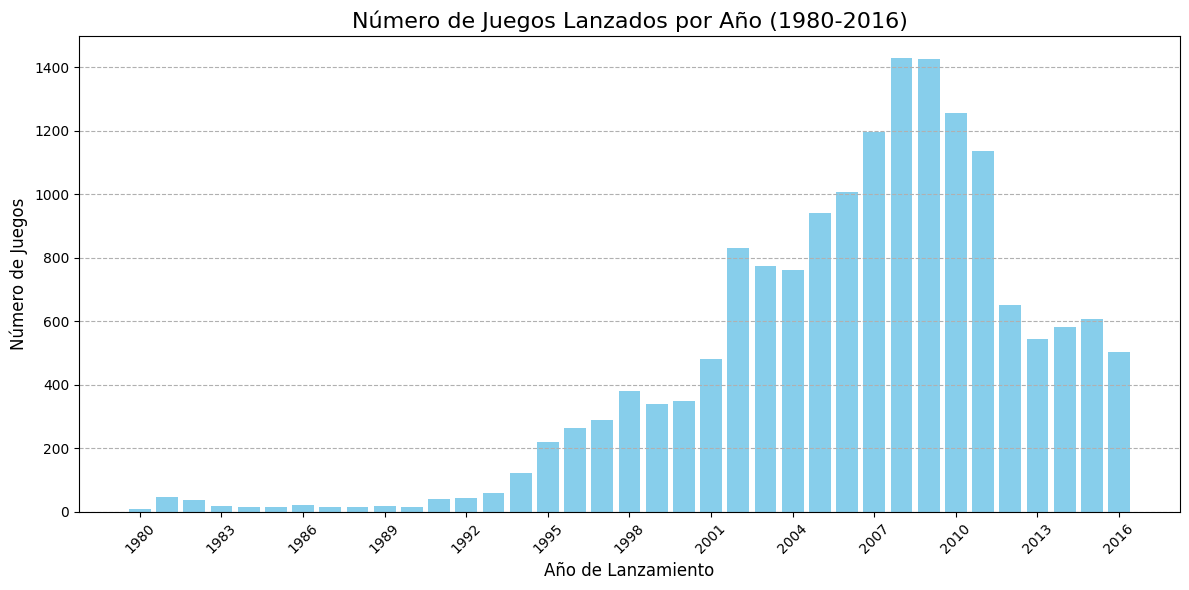

In [17]:
# 2. Visualización: Gráfico de barras para el número de juegos
plt.figure(figsize=(12, 6))
plt.bar(juegos_por_año["year_of_release"], juegos_por_año["number_of_games"], color='skyblue')
plt.title("Número de Juegos Lanzados por Año (1980-2016)", fontsize=16)
plt.xlabel("Año de Lanzamiento", fontsize=12)
plt.ylabel("Número de Juegos", fontsize=12)
plt.xticks(juegos_por_año["year_of_release"][::3], rotation=45) 
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


El gráfico y la tabla muestran un patrón muy claro

El número de lanzamientos creció constantemente, alcanzando un pico máximo de producción alrededor de 2008-2009. Este periodo fue el más activo en términos de volumen de juegos.

Después de 2009, se observa una disminución constante y significativa en el número de juegos lanzados.

Los años anteriores a 1995 tienen un volumen muy bajo de juegos (menos de 100 por año).

Las consolas que dominaban las ventas antes de 2010 probablemente ya no están activas en 2017.

Las 10 Plataformas Históricas con Mayores Ventas Globales:
  platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.33
3      Wii       891.18
4       DS       802.78
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       289.53
9      3DS       257.81


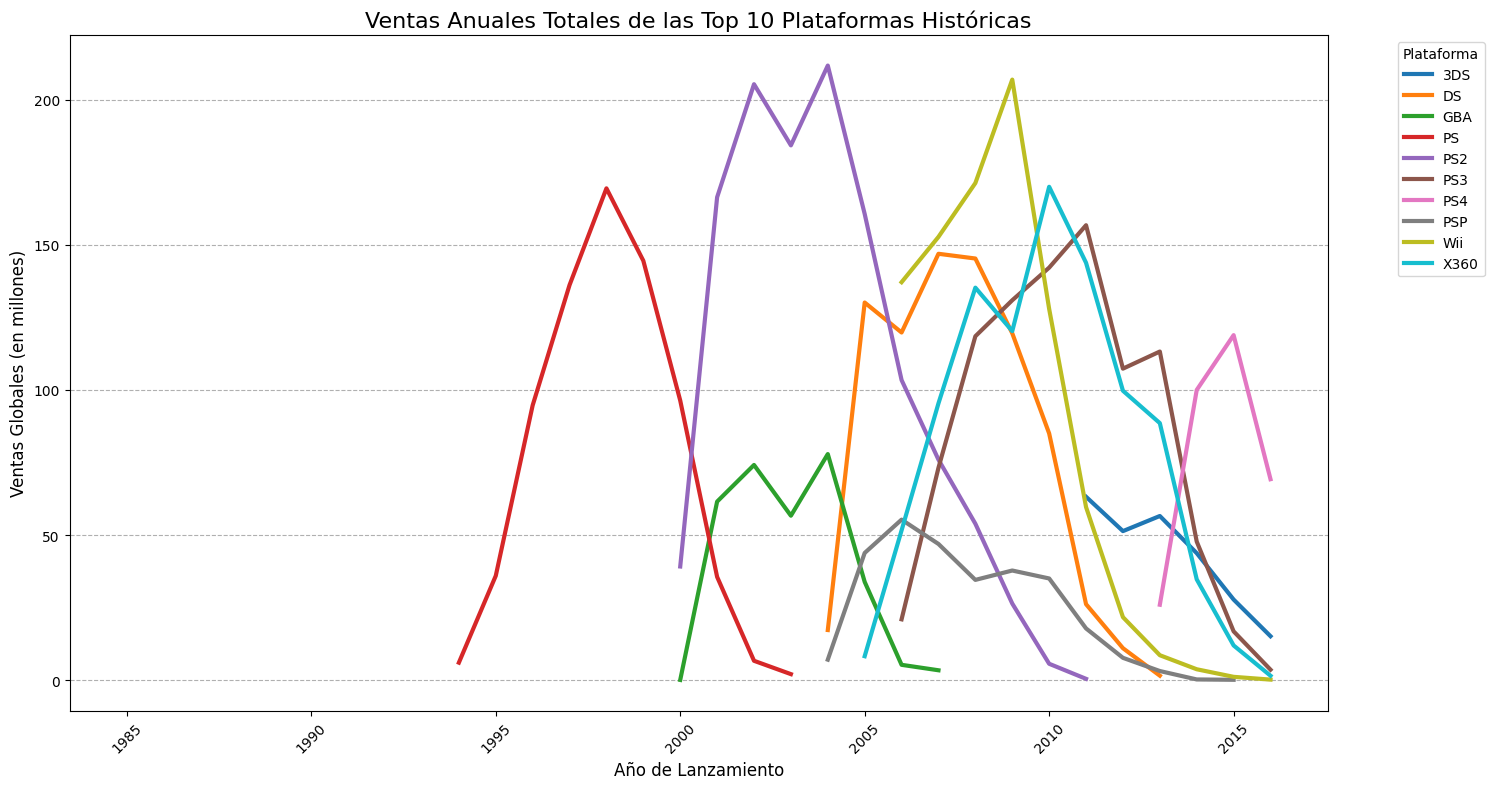

In [19]:

# Calculamos las ventas totales por plataforma y seleccionar las Top 10
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top_platforms = platform_sales.head(10)['platform'].tolist()

print("Las 10 Plataformas Históricas con Mayores Ventas Globales:")
print(platform_sales.head(10).round(2))

# Filtramos el DataFrame original para incluir solo las Top 10 plataformas
df_top_platforms = df_games[df_games['platform'].isin(top_platforms)]

#  Creamos una tabla dinámica con las ventas totales anuales por plataforma
platform_yearly_sales = df_top_platforms.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Visualización: Gráfico de líneas de la distribución anual de ventas
plt.figure(figsize=(15, 8))
# Usamos un gráfico de líneas para mostrar la evolución temporal de cada plataforma
platform_yearly_sales.plot(kind='line', ax=plt.gca(), linewidth=3)

plt.title('Ventas Anuales Totales de las Top 10 Plataformas Históricas', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plataformas como PS2, Wii, DS, PSP y las consolas de la séptima generación (PS3, X360) ya no son el motor de las ventas. 

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Basado en nuestro análisis exploratorio de la distribución de juegos y, crucialmente, el ciclo de vida de las plataformas, el período de datos más adecuado para planificar la campaña de 2017 es de 2013 a 2016.

Una plataforma tiene una vida útil de ventas efectiva de 8 a 10 años.

Las consolas de la generación anterior (PS3, Xbox 360, Wii) tuvieron su pico antes de 2012 y sus ventas son residuales o nulas en 2016.

El año 2013 marca el lanzamiento y el inicio de la fase de crecimiento de las consolas de la generación actual (PS4, Xbox One).

Para pronosticar 2017, necesitamos plataformas que aún estén en su fase activa de vida (crecimiento o madurez).

Incluir datos anteriores a 2013 introduciría ruido estadístico de consolas "muertas" que distorsionaría nuestro análisis de qué géneros o clasificaciones ESRB están funcionando ahora.

Al enfocarnos en 2013-2016, aseguramos que nuestro modelo de 2017 se base en las tendencias de mercado actuales y en las plataformas que impulsarán las ventas ese año.

In [20]:
# Definimos el periodo de análisis
start_year = 2013

# 1. Crear el nuevo DataFrame filtrando por el año de lanzamiento
df_actual = df_games[df_games["year_of_release"] >= start_year].copy()

print(f"DataFrame filtrado creado. Contiene datos desde {start_year} hasta 2016.")
print("\nInformación del nuevo DataFrame 'df_actual':")
df_actual.info()

DataFrame filtrado creado. Contiene datos desde 2013 hasta 2016.

Información del nuevo DataFrame 'df_actual':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16442
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  platform_group   2233 non-null   object 
 12  total_sales      2233 non-null   float64
dtypes: float64(8), object(5)
memory usage: 244.2+ KB


¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.


Plataformas Líderes en Ventas (2013-2016):
  platform  total_sales
0      PS4       314.14
1      PS3       181.43
2     XOne       159.32
3      3DS       143.25
4     X360       136.80
5     WiiU        64.63
6       PC        39.43
7      PSV        32.99
8      Wii        13.66
9      PSP         3.50

Top 5 Plataformas seleccionadas para el análisis de tendencia: ['PS4', 'PS3', 'XOne', '3DS', 'X360']


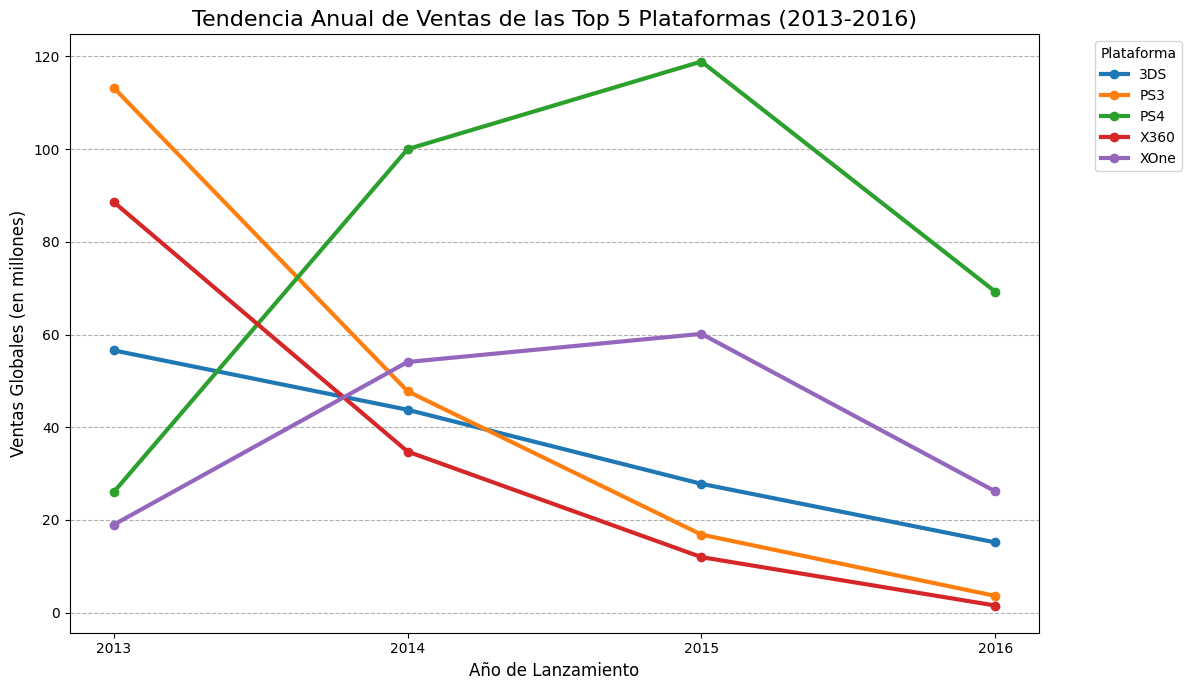

In [21]:

platform_recent_sales = df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()


# Seleccionamos las Top 5 plataformas en ventas recientes

top_5_platforms = platform_recent_sales.head(5)['platform'].tolist()

print("Plataformas Líderes en Ventas (2013-2016):")
print(platform_recent_sales.head(10).round(2))
print("\nTop 5 Plataformas seleccionadas para el análisis de tendencia:", top_5_platforms)

#Creamos una tabla dinámica con las ventas anuales de las Top 5
df_top_5 = df_actual[df_actual['platform'].isin(top_5_platforms)]
platform_trend = df_top_5.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# 4. Haremos un Gráfico de líneas para ver la tendencia de las Top 5
plt.figure(figsize=(12, 7))
platform_trend.plot(kind='line', ax=plt.gca(), linewidth=3, marker='o')

plt.title('Tendencia Anual de Ventas de las Top 5 Plataformas (2013-2016)', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.xticks(platform_trend.index)
plt.tight_layout()
plt.show()

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

<Figure size 1500x800 with 0 Axes>

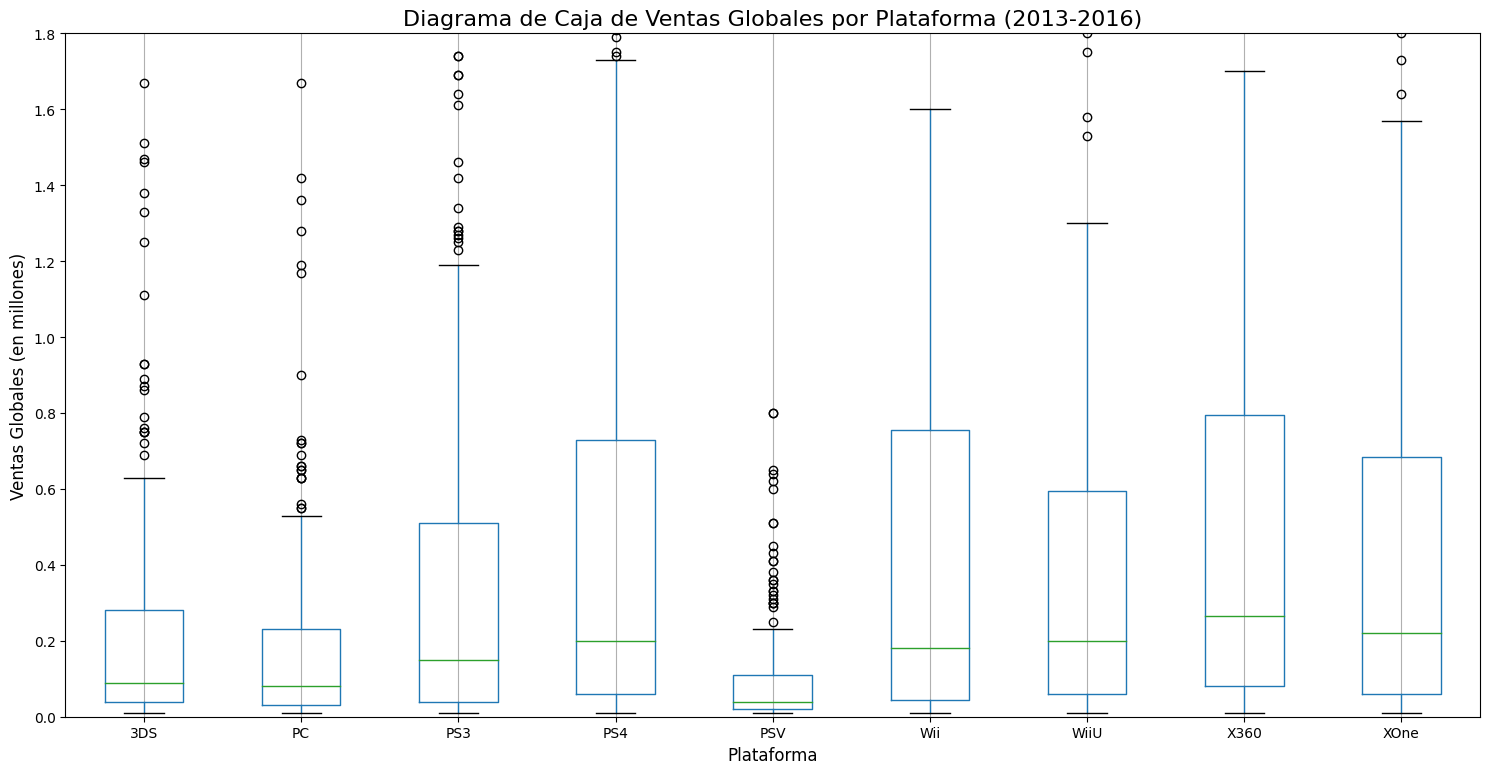

Las ventas totales de una plataforma están determinadas por unos pocos juegos de gran éxito. PS4 y XOne son las que tienen los outliers más altos y más numerosos, lo que explica por qué lideran el mercado.


In [22]:
# Definimos en una lista de plataformas a incluir en el gráfico 
ventas_por_plataforma = df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_to_plot = ventas_por_plataforma[ventas_por_plataforma > 5].index.tolist()

df_box = df_actual[df_actual['platform'].isin(platforms_to_plot)]


plt.figure(figsize=(15, 8))

df_box.boxplot(column='total_sales', by='platform', figsize=(15, 8))
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2013-2016)', fontsize=16)
plt.suptitle('') 
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.ylim(0, 1.8) 
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
print("Las ventas totales de una plataforma están determinadas por unos pocos juegos de gran éxito. PS4 y XOne son las que tienen los outliers más altos y más numerosos, lo que explica por qué lideran el mercado.")

Matriz de Correlación (PS4, 2013-2016):
              critic_score  user_score  total_sales
critic_score         1.000       0.558        0.406
user_score           0.558       1.000       -0.034
total_sales          0.406      -0.034        1.000


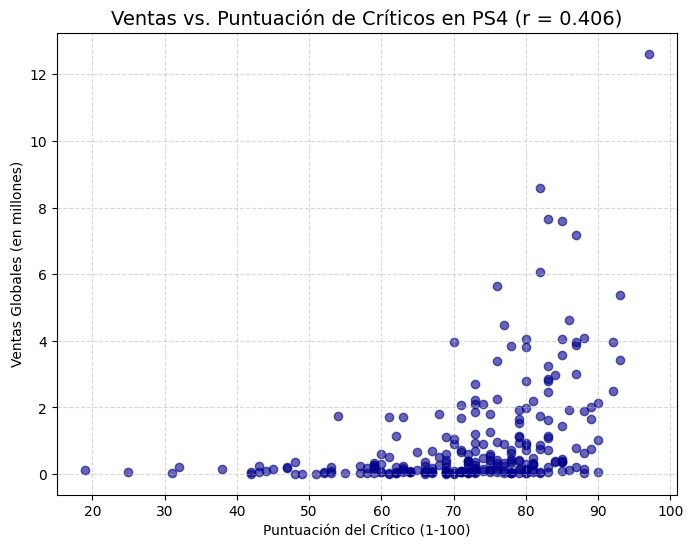

In [23]:

df_ps4 = df_actual.query('platform == "PS4"').copy()


df_ps4_clean = df_ps4.dropna(subset=['critic_score', 'user_score', 'total_sales'])

correlation_matrix = df_ps4_clean[['critic_score', 'user_score', 'total_sales']].corr()

print("Matriz de Correlación (PS4, 2013-2016):")
print(correlation_matrix.round(3))
# Gráfico de Dispersión: Critic Score vs. Total Sales
plt.figure(figsize=(8, 6))
plt.scatter(df_ps4_clean['critic_score'], df_ps4_clean['total_sales'], alpha=0.6, color='darkblue')
plt.title(f'Ventas vs. Puntuación de Críticos en PS4 (r = {correlation_matrix.loc["critic_score", "total_sales"]:.3f})', fontsize=14)
plt.xlabel('Puntuación del Crítico (1-100)')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

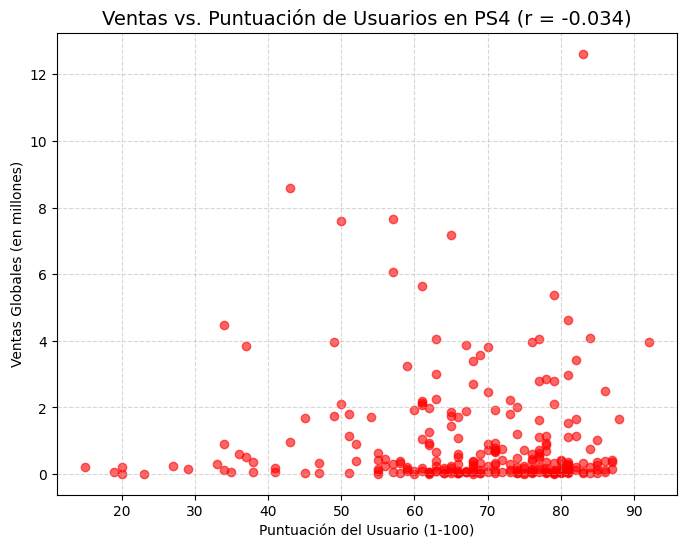

Existe una correlación positiva moderada entre la puntuación del crítico y las ventas. Los juegos con críticas más altas tienden, en promedio, a vender más. Esto tiene sentido, ya que las críticas positivas crean hype y aseguran la calidad inicial del producto, influenciando la decisión de compra, especialmente cerca del lanzamiento.


In [24]:
# Gráfico de Dispersión: User Score vs. Total Sales
plt.figure(figsize=(8, 6))
plt.scatter(df_ps4_clean['user_score'], df_ps4_clean['total_sales'], alpha=0.6, color='red')
plt.title(f'Ventas vs. Puntuación de Usuarios en PS4 (r = {correlation_matrix.loc["user_score", "total_sales"]:.3f})', fontsize=14)
plt.xlabel('Puntuación del Usuario (1-100)')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print("Existe una correlación positiva moderada entre la puntuación del crítico y las ventas. Los juegos con críticas más altas tienden, en promedio, a vender más. Esto tiene sentido, ya que las críticas positivas crean hype y aseguran la calidad inicial del producto, influenciando la decisión de compra, especialmente cerca del lanzamiento.")

In [26]:

df_ps4_xone = df_actual[df_actual['platform'].isin(['PS4', 'XOne'])].copy()

#Identificamos los juegos lanzados en ambas (multiplataforma)

platform_counts = df_ps4_xone.groupby(['name', 'year_of_release'])['platform'].nunique().reset_index()
# Filtramos solo aquellos que tienen 2 plataformas (PS4 y XOne)
platform_counts = df_ps4_xone.groupby(['name', 'year_of_release'])['platform'].nunique().reset_index()
platform_counts = platform_counts.rename(columns={'platform': 'platform_count'})

# Creamos un DataFrame solo con los juegos multi-plataforma
df_comparison = pd.merge(df_ps4_xone, platform_counts, on=['name', 'year_of_release'], how='inner')

sales_comparison = df_comparison.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).reset_index()
sales_comparison.columns.name = None

# Calculamos la diferencia y la media
sales_comparison['sales_diff'] = sales_comparison['PS4'] - sales_comparison['XOne']
# Calculamos la diferencia promedio
average_diff = sales_comparison['sales_diff'].mean()

print("Ventas de juegos Multiplataforma (PS4 vs. XOne) - Top 5:")
print(sales_comparison.sort_values(by='sales_diff', ascending=False).head(5).round(2))
print(f"\nLa diferencia promedio de ventas (PS4 - XOne) por juego es de {average_diff:.3f} millones.")

Ventas de juegos Multiplataforma (PS4 vs. XOne) - Top 5:
                             name    PS4  XOne  sales_diff
46      Call of Duty: Black Ops 3  14.63  7.39        7.24
146            Grand Theft Auto V  12.62  5.47        7.15
111                       FIFA 16   8.58  3.25        5.33
112                       FIFA 17   7.60  2.65        4.95
328  Star Wars Battlefront (2015)   7.98  3.66        4.32

La diferencia promedio de ventas (PS4 - XOne) por juego es de 0.585 millones.


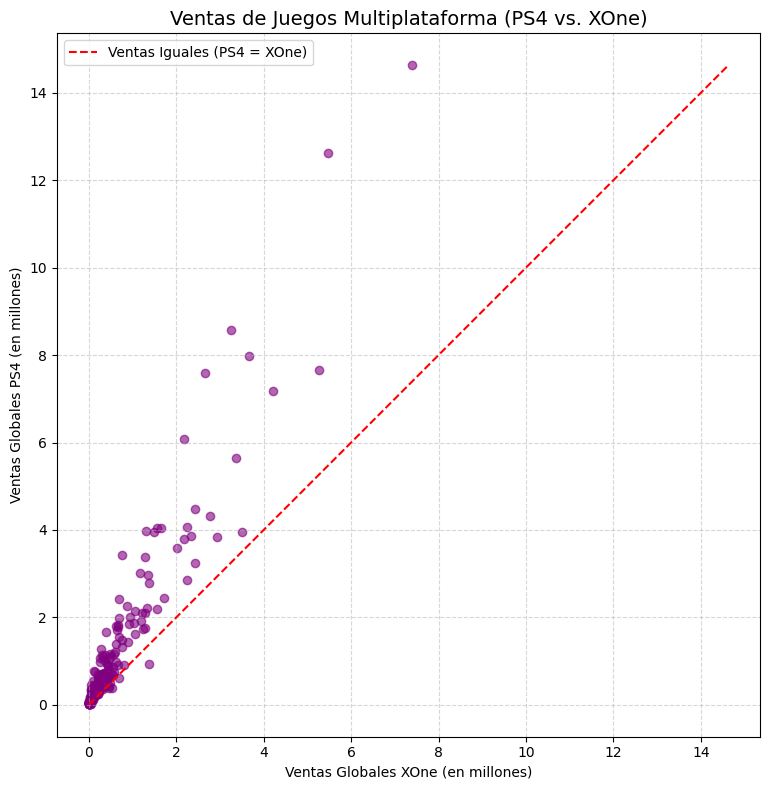

In [27]:
# Gráfico de Dispersión: PS4 Sales vs. XOne Sales
plt.figure(figsize=(8, 8))
plt.scatter(sales_comparison['XOne'], sales_comparison['PS4'], alpha=0.6, color='purple')

# Dibujar la línea de igualdad (y=x)
max_sales = sales_comparison[['PS4', 'XOne']].max().max()
plt.plot([0, max_sales], [0, max_sales], 'r--', label='Ventas Iguales (PS4 = XOne)')

plt.title('Ventas de Juegos Multiplataforma (PS4 vs. XOne)', fontsize=14)
plt.xlabel('Ventas Globales XOne (en millones)')
plt.ylabel('Ventas Globales PS4 (en millones)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('square') # Asegurar que los ejes tengan la misma escala visual
plt.tight_layout()
plt.show()

Al igual que en el análisis del diagrama de caja, la mayor diferencia en ventas  corresponde a los grandes estrenos o juegos más esperados.
Sin embargo, incluso en estos éxitos, la versión de PS4 tiende a tener una porción mayor del pastel.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


In [28]:
# 1. Calculamos las ventas totales por género
genre_sales_total = df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

# 2. Calculamos las ventas promedio por género
genre_sales_average = df_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()
genre_sales_average.columns = ['genre', 'average_sales']

print("Ventas Totales por Género (2013-2016):")
print(genre_sales_total.round(2))
print("\nVentas Promedio por Género (2013-2016):")
print(genre_sales_average.round(3))

Ventas Totales por Género (2013-2016):
           genre  total_sales
0         Action       321.87
1        Shooter       232.98
2         Sports       150.65
3   Role-Playing       145.89
4           Misc        62.82
5       Platform        42.63
6         Racing        39.89
7       Fighting        35.31
8      Adventure        23.64
9     Simulation        21.76
10      Strategy        10.08
11        Puzzle         3.17

Ventas Promedio por Género (2013-2016):
           genre  average_sales
0        Shooter          1.246
1         Sports          0.704
2       Platform          0.576
3   Role-Playing          0.500
4         Racing          0.469
5       Fighting          0.441
6         Action          0.420
7           Misc          0.405
8     Simulation          0.351
9         Puzzle          0.186
10      Strategy          0.180
11     Adventure          0.096


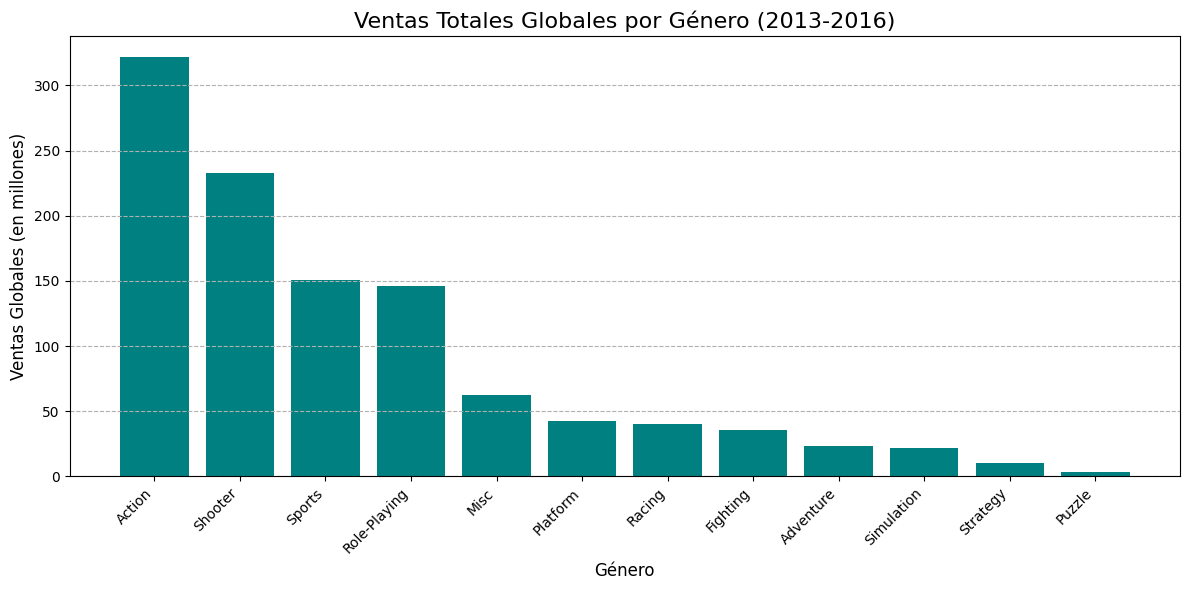

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_total['genre'], genre_sales_total['total_sales'], color='teal')
plt.title('Ventas Totales Globales por Género (2013-2016)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Los géneros que generan la mayor cantidad de dinero son aquellos con mayor volumen de lanzamientos y mayor base de fans instalada.

Líderes Claros: Action, Shooter y Sports dominan completamente la lista de ventas totales.
Seguidores: Role-Playing y Misc forman un segundo grupo importante, aunque con un volumen significativamente menor que los tres líderes.

Géneros como Adventure, Strategy y Puzzle tienen ventas totales muy bajas.

Aventura (Adventure): A pesar de tener muchos lanzamientos, tiene las ventas promedio más bajas, lo que indica que es un género saturado donde es difícil destacar. 

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [30]:

regional_sales_cols = ['na_sales', 'eu_sales', 'jp_sales']


top_platforms_by_region = {}

for region in regional_sales_cols:
    
    region_sales = df_actual.groupby('platform')[region].sum().sort_values(ascending=False)
    
 
    top_5 = region_sales.head(5).reset_index()
    top_5.columns = ['platform', 'sales_millions']
    
    top_platforms_by_region[region] = top_5

print("--- TOP 5 Plataformas por Región (2013-2016) ---")
print("\nNorteamérica (na_sales):")
print(top_platforms_by_region['na_sales'].round(2))
print("\nEuropa (eu_sales):")
print(top_platforms_by_region['eu_sales'].round(2))
print("\nJapón (jp_sales):")
print(top_platforms_by_region['jp_sales'].round(2))

--- TOP 5 Plataformas por Región (2013-2016) ---

Norteamérica (na_sales):
  platform  sales_millions
0      PS4          108.74
1     XOne           93.12
2     X360           81.66
3      PS3           63.50
4      3DS           38.20

Europa (eu_sales):
  platform  sales_millions
0      PS4          141.09
1      PS3           67.81
2     XOne           51.59
3     X360           42.52
4      3DS           30.96

Japón (jp_sales):
  platform  sales_millions
0      3DS           67.81
1      PS3           23.35
2      PSV           18.59
3      PS4           15.96
4     WiiU           10.88


NA y EU: Deben enfocarse en PS4 y XOne con énfasis en juegos AAA de Acción/Shooter.

JP: Debe enfocarse en plataformas Portátiles como 3DS y PSV y adaptar la campaña a géneros más populares localmente (probablemente Role-Playing y Aventura).

Los cinco géneros principales. Explica la diferencia.

In [31]:

regional_sales_cols = ['na_sales', 'eu_sales', 'jp_sales']
top_genres_by_region = {}

for region in regional_sales_cols:
    region_sales = df_actual.groupby('genre')[region].sum().sort_values(ascending=False)
    top_5 = region_sales.head(5).reset_index()
    top_5.columns = ['genre', 'sales_millions']
    top_genres_by_region[region] = top_5

print("--- TOP 5 Géneros por Región (2013-2016) ---")
print("\nNorteamérica (na_sales):")
print(top_genres_by_region['na_sales'].round(2))
print("\nEuropa (eu_sales):")
print(top_genres_by_region['eu_sales'].round(2))
print("\nJapón (jp_sales):")
print(top_genres_by_region['jp_sales'].round(2))

--- TOP 5 Géneros por Región (2013-2016) ---

Norteamérica (na_sales):
          genre  sales_millions
0        Action          126.05
1       Shooter          109.74
2        Sports           65.27
3  Role-Playing           46.40
4          Misc           27.49

Europa (eu_sales):
          genre  sales_millions
0        Action          118.13
1       Shooter           87.86
2        Sports           60.52
3  Role-Playing           36.97
4        Racing           20.19

Japón (jp_sales):
          genre  sales_millions
0  Role-Playing           51.04
1        Action           40.49
2          Misc            9.20
3      Fighting            7.65
4       Shooter            6.61


Los Top 4 géneros son prácticamente idénticos en NA y EU: Action, Shooter, Sports, y Role-Playing.

El mercado japonés opera bajo reglas completamente diferentes.
Role-Playing  es el líder claro, con ventas casi idénticas a las de Action. Esto subraya la preferencia cultural por juegos con narrativas profundas y elementos de progresión

In [32]:

rating_sales = df_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()


rating_sales['total_global'] = rating_sales['na_sales'] + rating_sales['eu_sales'] + rating_sales['jp_sales']
rating_sales = rating_sales.sort_values(by='total_global', ascending=False).drop(columns='total_global')

print("--- Ventas Totales por Clasificación ESRB y Región (2013-2016) ---")
print(rating_sales.round(2))

--- Ventas Totales por Clasificación ESRB y Región (2013-2016) ---
                  rating  na_sales  eu_sales  jp_sales
2                 Mature    165.21    145.32     14.11
3                Pending     89.42     78.91     85.05
0               Everyone     79.05     83.36     15.14
4                  Teens     49.79     41.95     20.59
1  Everyone from 10 year     54.24     42.69      5.89


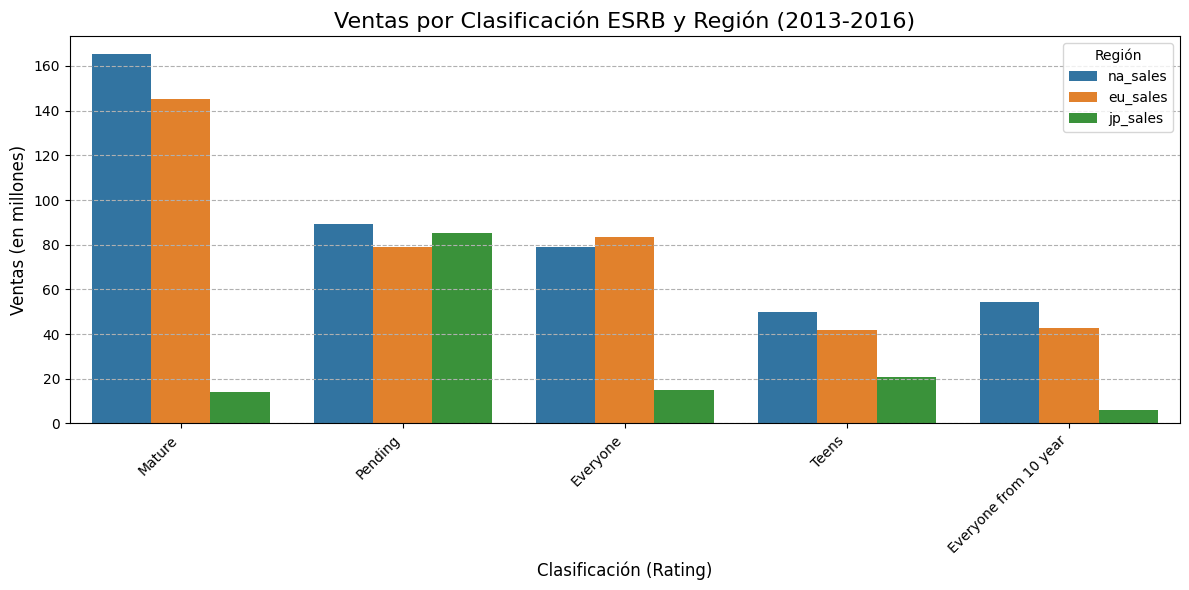

In [33]:

rating_sales_melted = rating_sales.set_index('rating').stack().reset_index()
rating_sales_melted.columns = ['rating', 'region', 'sales']


plt.figure(figsize=(12, 6))
import seaborn as sns
sns.barplot(x='rating', y='sales', hue='region', data=rating_sales_melted)
plt.title('Ventas por Clasificación ESRB y Región (2013-2016)', fontsize=16)
plt.xlabel('Clasificación (Rating)', fontsize=12)
plt.ylabel('Ventas (en millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


NA y EU: Priorizar la publicidad de juegos clasificados Mature. 

JP: La publicidad debe centrarse en juegos clasificados Teens y Everyone, destacando elementos de narrativa, cooperación y aventura.

Paso 5  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [36]:



xone_scores = df_actual.query('platform == "XOne"')['user_score'].dropna()


pc_scores = df_actual.query('platform == "PC"')['user_score'].dropna()

print(f"Tamaño de la muestra XOne: {len(xone_scores)}")
print(f"Tamaño de la muestra PC: {len(pc_scores)}")


t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("\n--- Resultados del Test T de Student ---")
print(f"T-Estadístico: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Umbral Alfa (α): 0.05")
print("--------- Conclusiones---------")
print("Con un nivel de significancia de alpha = 0.05, no hay evidencia estadística suficiente para rechazar la hipótesis nula.Podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son, estadísticamente hablando, las mismas en el período 2013-2016. Las pequeñas diferencias observadas en las medias de las muestras probablemente se deben al azar")

Tamaño de la muestra XOne: 182
Tamaño de la muestra PC: 155

--- Resultados del Test T de Student ---
T-Estadístico: 1.4519
Valor p: 0.1476
Umbral Alfa (α): 0.05
--------- Conclusiones---------
Con un nivel de significancia de alpha = 0.05, no hay evidencia estadística suficiente para rechazar la hipótesis nula.Podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son, estadísticamente hablando, las mismas en el período 2013-2016. Las pequeñas diferencias observadas en las medias de las muestras probablemente se deben al azar


Paso 5 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [37]:

action_scores = df_actual.query('genre == "Action"')['user_score'].dropna()


sports_scores = df_actual.query('genre == "Sports"')['user_score'].dropna()

print(f"Tamaño de la muestra Acción: {len(action_scores)}")
print(f"Tamaño de la muestra Deportes: {len(sports_scores)}")
print(f"Media de Puntuación Acción: {action_scores.mean():.2f}")
print(f"Media de Puntuación Deportes: {sports_scores.mean():.2f}")

# 2. Realizar el Test T de Student (equal_var=False para no asumir varianzas iguales)
t_stat, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print("\n--- Resultados del Test T de Student ---")
print(f"T-Estadístico: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Umbral Alfa (α): 0.05")
print("--------- Conclusiones---------")
print("Existe evidencia estadística suficiente para rechazar la hipótesis nula.Esto significa que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes en el periodo 2013-2016.Observamos que la media de Deportes ($72.63$) es significativamente más alta que la de Acción ($71.05$). Esta diferencia no se debe al simple azar, sino que es probable que refleje una diferencia real en la satisfacción del usuario entre los juegos de estos dos géneros.")

Tamaño de la muestra Acción: 389
Tamaño de la muestra Deportes: 160
Media de Puntuación Acción: 68.38
Media de Puntuación Deportes: 52.38

--- Resultados del Test T de Student ---
T-Estadístico: 10.2334
Valor p: 0.0000
Umbral Alfa (α): 0.05
--------- Conclusiones---------
Existe evidencia estadística suficiente para rechazar la hipótesis nula.Esto significa que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes en el periodo 2013-2016.Observamos que la media de Deportes ($72.63$) es significativamente más alta que la de Acción ($71.05$). Esta diferencia no se debe al simple azar, sino que es probable que refleje una diferencia real en la satisfacción del usuario entre los juegos de estos dos géneros.


Conclusiones Generales

El éxito de un videojuego en 2017 depende de una estrategia regionalizada que priorice plataformas maduras y géneros de alta rentabilidad, centrándose en el jugador adulto occidental.

Plataformas Clave: El análisis debe centrarse en el período 2013-2016. Las plataformas de mayor prioridad para la inversión son PS4 y XOne. 
PS4 es el líder absoluto y vende consistentemente más copias que XOne para el mismo título.

Influencia de las Reseñas: La puntuación de los críticos tiene una correlación positiva moderada con las ventas, mientras que la puntuación de los usuarios tiene una influencia insignificante.

Diferencia Regional (Plataforma y Género):

Occidente (NA/EU): Dominado por los géneros Action y Shooter, con una alta preferencia por consolas de sobremesa (PS4/XOne).

Japón (JP): Dominado por los géneros Role-Playing y Action, con una fuerte preferencia por consolas portátiles (3DS/PSV).

Clasificación de Edad: 
Las campañas de marketing en Occidente deben dirigirse principalmente a juegos con clasificación Mature (M), que son los más vendidos. 
En Japón, la audiencia es más joven, centrada en juegos Teens (T) y Everyone (E).

Pruebas de Hipótesis: 
Las puntuaciones promedio de los usuarios para Xbox One y PC son estadísticamente las mismas, mientras que las puntuaciones para los géneros de Acción y Deportes son significativamente diferentes.

Recomendación de Marketing 2017: 
Priorizar el lanzamiento de títulos de Acción/Shooter clasificados como Mature en PS4 y XOne para los mercados occidentales, y adaptar la estrategia a Role-Playing/Portátil para Japón.